In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


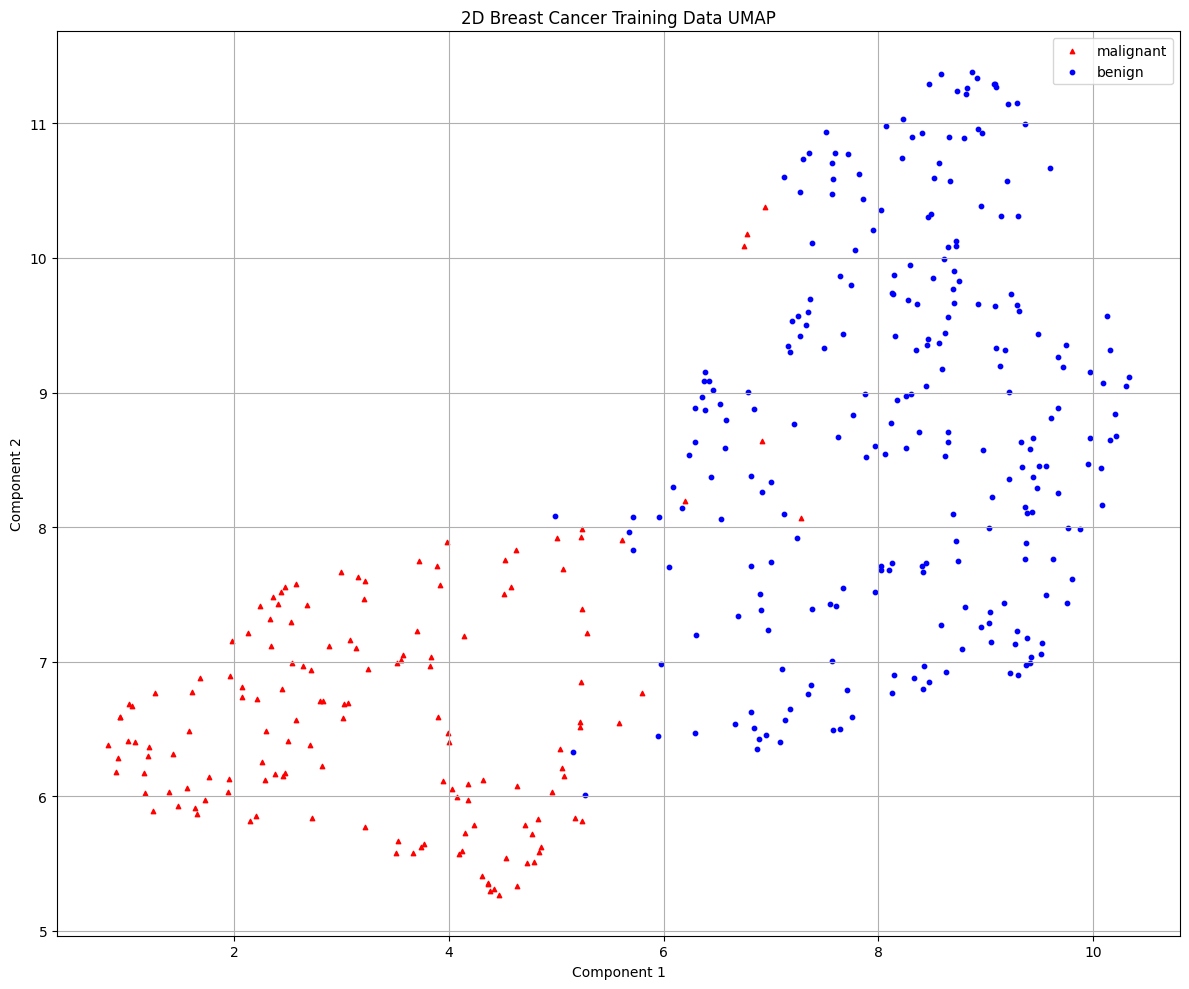

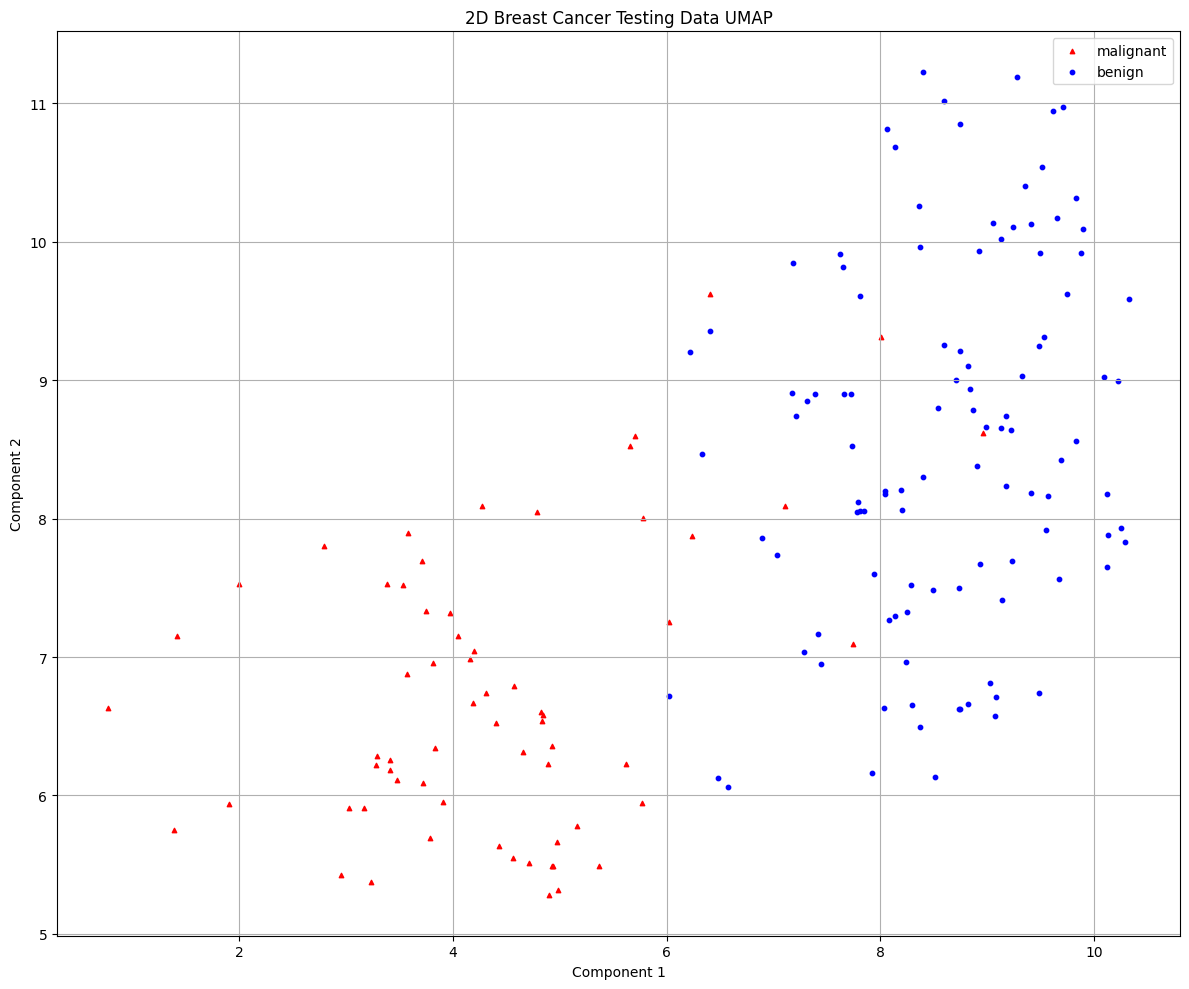

[I 2025-04-27 06:23:50,105] A new study created in memory with name: no-name-4924b776-f994-4ad1-b933-5f759c17a811
[I 2025-04-27 06:26:37,759] Trial 0 finished with value: 0.959746835443038 and parameters: {'n_estimators': 8216, 'learning_rate': 0.0013198787866853647, 'num_leaves': 24, 'max_depth': 12, 'min_child_samples': 74, 'subsample': 0.5913088641893574, 'colsample_bytree': 0.5077542868142683, 'reg_alpha': 2.206230133878019, 'reg_lambda': 0.0001012059657157477}. Best is trial 0 with value: 0.959746835443038.
[I 2025-04-27 06:30:01,286] Trial 1 finished with value: 0.9597784810126582 and parameters: {'n_estimators': 8353, 'learning_rate': 0.07871702356630321, 'num_leaves': 71, 'max_depth': 5, 'min_child_samples': 82, 'subsample': 0.8569553994620974, 'colsample_bytree': 0.8134730706735337, 'reg_alpha': 0.028371597197016457, 'reg_lambda': 4.068768271087751}. Best is trial 1 with value: 0.9597784810126582.
[I 2025-04-27 06:30:20,068] Trial 2 finished with value: 0.9649683544303798 and 

Best trial:
Accuracy: 0.9749050632911394
Best hyperparameters:  {'n_estimators': 669, 'learning_rate': 0.03115403668582264, 'num_leaves': 47, 'max_depth': 6, 'min_child_samples': 75, 'subsample': 0.6676875608670272, 'colsample_bytree': 0.9618497398572706, 'reg_alpha': 0.07393627093064532, 'reg_lambda': 3.460908316200868e-07}


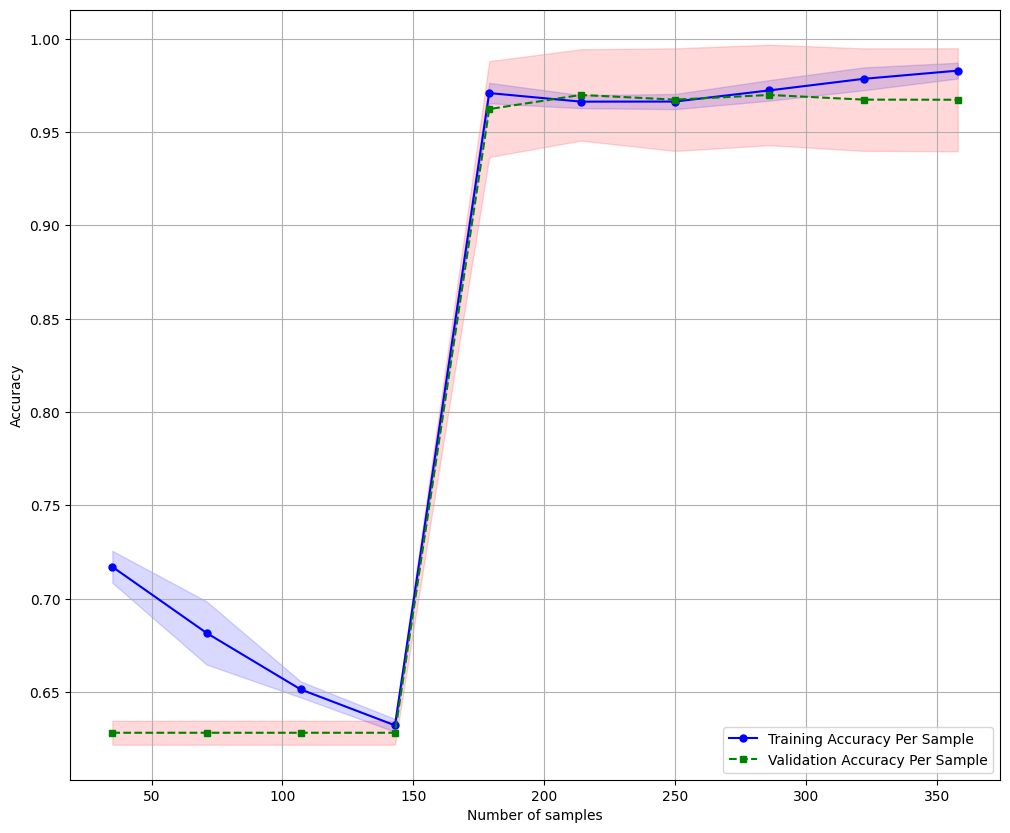

Confusion Matrix
[[ 51  13]
 [  0 107]]
Accuracy: 0.9240, Precision: 0.8917, Recall: 1.0000, F1: 0.9427, AUC: 0.9632


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'umap', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)